# Project: Wrangling and Analyze Data
In this Project, I will be performing Data Wranging on the Twitter archive data of WeRateDogs. [WeRateDogs]('https://twitter.com/dog_rates') is a Twitter account that rates people's dogs with a humorous comment about the dog.

# Project Steps
1. Data Wrangling
    - [Data Gathering](#Data-Gathering)
    - [Assessing Data](#Assessing-Data)
    - [Cleaning Data]('#Cleaning-Data')
2. [Storing Data](#Storing-Data)
3. [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)

In [147]:
# importing the required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import requests
import os
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [148]:
tweet = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [149]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [150]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [151]:
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [152]:
#create a list of columns we want from the json file
cols = ['tweet_id', 'favorite_count', 'retweet_count']
#create an empty list to store dictionaries of the result
tweet_list = []
#load json file
data = [json.loads(file)
        for file in open('tweet_json.txt', 'r', encoding='utf-8')]
#read the file line by line into a DataFrame with tweet ID, retweet count, and favorite count
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    for line in data:
        tweet_id = line['id']
        favorite_count = line['favorite_count']
        retweet_count = line['retweet_count']
        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count)
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = cols)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [153]:
tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [154]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [155]:
tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


### Programmatic Assessment

In [156]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [157]:
tweet.shape

(2356, 17)

In [158]:
tweet.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2088,670792680469889025,NaN,NaN,2015-11-29 02:33:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Antony. He's a Sheraton Tetrahedron. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670792680...,7,10,Antony,None,None,None,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
1999,672523490734551040,NaN,NaN,2015-12-03 21:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says she'll be ready in a minute but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672523490...,10,10,None,None,None,None,None
114,870656317836468226,NaN,NaN,2017-06-02 15:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cody. He zoomed too aggressively and t...,NaN,NaN,NaN,https://www.gofundme.com/help-fix-codys-torn-a...,13,10,Cody,None,None,None,None
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's sick of these bullshit gen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942...,11,10,Lucy,None,None,None,None


In [159]:
type(tweet.timestamp[5])

str

In [160]:
tweet.rating_denominator[tweet.rating_denominator > 10]

342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64

In [161]:
tweet.rating_numerator[tweet.rating_numerator > 20]

188      420
189      666
290      182
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

In [162]:
tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [163]:
tweet.name.value_counts().head(15)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Daisy        7
Bailey       7
Name: name, dtype: int64

In [164]:
tweet.name[tweet.name.str.islower()].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
unacceptable     1
incredibly       1
my               1
his              1
this             1
infuriating      1
officially       1
by               1
light            1
all              1
life             1
space            1
such             1
old              1
Name: name, dtype: int64

In [165]:
tweet.duplicated().any()

False

In [166]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [167]:
image_prediction.shape

(2075, 12)

In [168]:
tweet_json.shape

(2354, 3)

In [169]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Quality issues
1. Only 78 entries in in_reply_to_status_id and in_reply_to_user_id

2. Timestamp column in `archive` is a string not a datetime data

3. Invalid entries in the names column e.g. 'getting', 'a', 'actually', etc.

4. retweeted_status_id and retweeted_status_user_id and retweeted_status_timestamp have 181 entries.

5. Invalid data types: tweet_id in `tweet` and `image_prediction` tables

6. Some denominators are greater than 10.

7. Source column in `tweet` table can be cleaned properly to have the possible sources of tweets. 

8. Rename some columns in `image_prediction` to be more descriptive.

### Tidiness issues
1. tweet_count and favorite_count should be part of `tweet` table

2. doggo, floofer, pupper, puppo columns in `tweet` table should be collapsed into a single dog_stage column

3. Drop columns that are not needed from the `tweet` table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [170]:
# Make copies of original pieces of data
tweet_clean = tweet.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

## Quality Issues

### Issue #1: Only 78 entries in in_reply_to_status_id and in_reply_to_user_id
This means that we have 78 entries in the dataset which are replies to original tweet.

#### Define
Drop the rows where these columns are not null because we are only interested in original tweets. Do this by subsetting rows where in_reply_to_status_id and in_reply_to_status_user_id is null and reassign to the dataframe

#### Code

In [171]:
tweet_clean = tweet_clean[tweet_clean.in_reply_to_status_id.isna()]

#### Test

In [172]:
tweet_clean[~tweet_clean.in_reply_to_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [173]:
tweet_clean[~tweet_clean.in_reply_to_user_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: Timestamp column in `archive` is a string not a datetime data

#### Define
Change the data type of timestamp column to datetime

#### Code

In [174]:
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)

#### Test

In [175]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1),

### Issue #3: Invalid entries in the names column e.g. 'getting', 'a', 'actually', etc.

#### Define
Change rows with invalid entries in names column to NaN using .replace()

#### Code

In [176]:
invalid_names = tweet_clean.name[tweet_clean.name.str.islower()]
tweet_clean.name.replace(invalid_names, np.nan, inplace=True)
tweet_clean.name.replace("None", np.nan, inplace=True)

#### Test

In [177]:
tweet_clean.name.str.islower().any()

False

In [178]:
tweet_clean.query("name == None")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have 181 entries
This means that we have 181 entries in the dataset which are retweets of original tweet.

#### Define
Drop the rows that where these entries are not null because we are only interested in original tweets. Do this by subsetting rows where retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have 181 entries is null and reassign to the dataframe.

#### Code

In [179]:
tweet_clean = tweet_clean[tweet_clean.retweeted_status_id.isna()]

#### Test

In [180]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Issue #5: Invalid data types: tweet_id in `tweet` and `image_prediction` tables

#### Define
Change the data type of these columns to string by using astype() method

#### Code

In [181]:
#convert tweet_id column in tweet table to string
tweet_clean.tweet_id = tweet_clean.tweet_id.astype('str')
#convert tweet_id column in image_prediction to string
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype('str')

#### Test

In [182]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [183]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6: Some denominators are greater than 10

#### Define
Drop rows where rating_denominator is greater than 10. Based on the unique rating system, the rating denominator should always be equal to 10

#### Code

In [184]:
tweet_clean.drop(tweet_clean[tweet_clean.rating_denominator > 10].index, inplace=True)

#### Test

In [185]:
tweet_clean[tweet_clean.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [186]:
tweet_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,0.0,0.0,0.0,0.0,2082.000000,2082.000000
mean,NaN,NaN,NaN,NaN,11.698847,9.994717
std,NaN,NaN,NaN,NaN,39.799342,0.187220
min,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,NaN,NaN,NaN,NaN,12.000000,10.000000
max,NaN,NaN,NaN,NaN,1776.000000,10.000000


### Issue #7: Source column in `tweet` table can be cleaned properly to have the possible sources of tweets.

#### Define
Extract the exact source string using regex to get the values just before the closing tag </a> of the url.

#### Code

In [187]:
tweet_clean.source = tweet_clean.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [188]:
tweet_clean.source.value_counts()

Twitter for iPhone     1949
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #8: Rename some columns in `image_prediction` to be more descriptive.

#### Define
Rename p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns

#### Code

In [189]:
cols = {'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
        'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
        'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}
image_prediction_clean.rename(columns=cols, inplace=True)

#### Test

In [190]:
list(image_prediction_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

## Tidiness Issues

### Issue #1: tweet_count and favorite_count should be part of `tweet` table

#### Define
Merge tweet_count and favorite_count columns to the `tweet` table

#### Code

In [191]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2082 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2082 non-null datetime64[ns]
source                        2082 non-null object
text                          2082 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2079 non-null object
rating_numerator              2082 non-null int64
rating_denominator            2082 non-null int64
name                          1388 non-null object
doggo                         2082 non-null object
floofer                       2082 non-null object
pupper                        2082 non-null object
puppo                         2082 non-null object
dtypes: datetime64[ns](1), floa

In [192]:
#merge tweet_json to tweet_table on tweet_id
tweet_clean = pd.merge(tweet_clean, tweet_json_clean,
                            on=['tweet_id'], how='left')

#### Test

In [193]:
tweet_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048,9774


In [194]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2081
Data columns (total 19 columns):
tweet_id                      2082 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2082 non-null datetime64[ns]
source                        2082 non-null object
text                          2082 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2079 non-null object
rating_numerator              2082 non-null int64
rating_denominator            2082 non-null int64
name                          1388 non-null object
doggo                         2082 non-null object
floofer                       2082 non-null object
pupper                        2082 non-null object
puppo                         2082 non-null object
favorite_count                2

### Issue #2: doggo, floofer, pupper, puppo columns in `tweet` table should be collapsed into a single dog_stage column

#### Define
Convert doggo, floofer, pupper, puppo columns into a single column assign it to a new dog_stage column in the DataFrame

#### Code

In [195]:
tweet_clean['dog_stage'] = tweet_clean.doggo.str.cat(tweet_clean.floofer).str.cat(tweet_clean.pupper).str.cat(tweet_clean.puppo)

In [196]:
tweet_clean.dog_stage.value_counts()

NoneNoneNoneNone        1746
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
doggoNonepupperNone        9
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [197]:
#remove None from the values
tweet_clean.dog_stage = tweet_clean['dog_stage'].map(lambda x: x.replace("None",""))
tweet_clean.dog_stage.value_counts()

                1746
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [198]:
#replace empty values with None
tweet_clean.dog_stage.replace("", np.nan, inplace=True)

In [199]:
#drop the old columns
tweet_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

In [200]:
tweet_clean.dog_stage.value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

#### Test

In [201]:
tweet_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
2056,666362758909284353,NaN,NaN,2015-11-16 21:10:36,Twitter for iPhone,Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,NaN,804,595,NaN
1630,674764817387900928,NaN,NaN,2015-12-10 01:37:23,Twitter for iPhone,These two pups are masters of camouflage. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674764817...,10,10,NaN,852,263,NaN
307,826240494070030336,NaN,NaN,2017-01-31 01:27:39,Twitter for iPhone,We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494...,11,10,NaN,14614,2965,NaN
25,886983233522544640,NaN,NaN,2017-07-17 16:17:36,Twitter for iPhone,This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,35859,8084,NaN
1725,672622327801233409,NaN,NaN,2015-12-04 03:43:54,Twitter for iPhone,This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,NaN,1377,542,pupper


### Issue #3: Redundant columns in the `tweet` table

#### Define
Drop columns that are not needed from the `tweet` table using pandas drop method

#### Code

In [202]:
tweet_clean = tweet_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                          'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [203]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2081
Data columns (total 11 columns):
tweet_id              2082 non-null object
timestamp             2082 non-null datetime64[ns]
source                2082 non-null object
text                  2082 non-null object
expanded_urls         2079 non-null object
rating_numerator      2082 non-null int64
rating_denominator    2082 non-null int64
name                  1388 non-null object
favorite_count        2082 non-null int64
retweet_count         2082 non-null int64
dog_stage             336 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 195.2+ KB


Merge image_prediction table to tweet table using an inner merge since we only want tweets with images.

In [204]:
tweet_clean = pd.merge(tweet_clean, image_prediction_clean,
                            on=['tweet_id'], how='inner')

In [205]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1955
Data columns (total 22 columns):
tweet_id              1956 non-null object
timestamp             1956 non-null datetime64[ns]
source                1956 non-null object
text                  1956 non-null object
expanded_urls         1956 non-null object
rating_numerator      1956 non-null int64
rating_denominator    1956 non-null int64
name                  1347 non-null object
favorite_count        1956 non-null int64
retweet_count         1956 non-null int64
dog_stage             303 non-null object
jpg_url               1956 non-null object
img_num               1956 non-null int64
first_prediction      1956 non-null object
first_confidence      1956 non-null float64
first_dog             1956 non-null bool
second_prediction     1956 non-null object
second_confidence     1956 non-null float64
second_dog            1956 non-null bool
third_prediction      1956 non-null object
third_confidence      1956 non-nu

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [206]:
tweet_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [207]:
dog_data = pd.read_csv('twitter_archive_master.csv')

In [208]:
dog_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [209]:
dog_data.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,first_confidence,second_confidence,third_confidence
count,1.956000e+03,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1.956000e+03,1.956000e+03
mean,7.361924e+17,11.701431,9.994376,8965.263804,2783.892638,1.201943,0.594341,1.348090e-01,6.007301e-02
std,6.769150e+16,41.060230,0.193154,12297.740443,4703.415531,0.559152,0.272334,1.011479e-01,5.079459e-02
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758153e+17,10.000000,10.000000,1956.750000,623.750000,1.000000,0.362775,5.352722e-02,1.603040e-02
50%,7.087745e+17,11.000000,10.000000,4148.000000,1366.500000,1.000000,0.587635,1.175370e-01,4.941030e-02
75%,7.885006e+17,12.000000,10.000000,11412.250000,3241.000000,1.000000,0.847560,1.960392e-01,9.152147e-02
max,8.924206e+17,1776.000000,10.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


### Insight #1: Which dog stage was more frequent?

In [210]:
dog_data.dog_stage.value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

### Insight #2: What is the most common dog breed after the first prediction?

In [211]:
dog_data.first_prediction.value_counts()[0:10]

golden_retriever      135
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: first_prediction, dtype: int64

### Insight #3: What is the average confidence interval of the most common dog breed after the first prediction?

In [212]:
dog_data.first_confidence[dog_data.first_prediction == 'golden_retriever'].mean()

0.73016648148148144

### Insight #4: Which tweet has the most like?

In [213]:
dog_data.nlargest(1, 'favorite_count')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
306,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,132810,48265,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


### Insight #5: Dog stage with highest number of likes

In [214]:
dog_data.groupby('dog_stage').favorite_count.sum().sort_values(ascending=False)

dog_stage
pupper          1457356
doggo           1219452
puppo            474806
doggopupper      105759
floofer           92442
doggopuppo        47844
doggofloofer      17169
Name: favorite_count, dtype: int64

### Insights
1. Most dogs whose stage were posted are pupper

2. Golden retriever is the outcome of most of the first  image predictions

3. Average confidence interval when first prediction is golden retriever is equal to 0.73

4. Tweet with the highest number of likes is the tweet with tweet_id 822872901745569793.

5. Pupper is the dog stage with the highest number of likes.

### Visualization

In [215]:
sns.set_style(style="darkgrid")
# define a bar chart function
def bar_chart(arg1, x_label, y_label, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    sns.barplot(data=dog_data, y=arg1, x='dog_stage', ax=ax, ci=None)
    ax.set(xlabel=x_label, ylabel=y_label, title=title)

#### 1. Average Number of Likes by Dog Stage

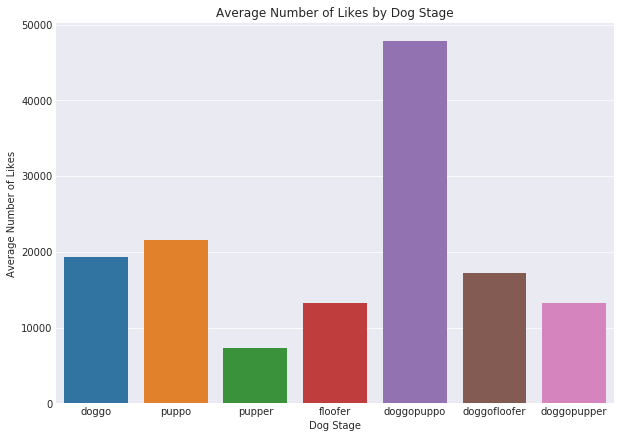

In [216]:
bar_chart('favorite_count', 'Dog Stage', 'Average Number of Likes', 'Average Number of Likes by Dog Stage')

#### 2. Average Rating by Dog Stage

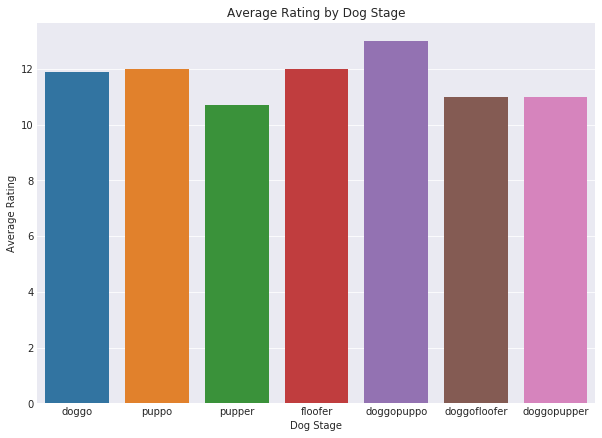

In [217]:
bar_chart('rating_numerator', 'Dog Stage', 'Average Rating', 'Average Rating by Dog Stage')

#### 3. Source with the highest number of tweets

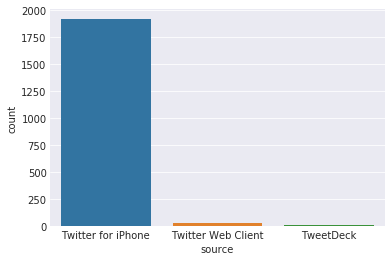

In [218]:
sns.countplot('source', data=dog_data)